In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

import nltk
import re

nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

C:\Users\INKY\AppData\Local\Temp\ipykernel_15748\1883220018.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\INKY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\INKY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data = pd.read_csv("Instagram data.csv", encoding = "latin1")

In [3]:
data

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [4]:
for column in data:
    print("coloumn name:", column, "- missing values", data[column].isnull().sum())
    print("----------------------------------------------------------------------")

coloumn name: Impressions - missing values 0
----------------------------------------------------------------------
coloumn name: From Home - missing values 0
----------------------------------------------------------------------
coloumn name: From Hashtags - missing values 0
----------------------------------------------------------------------
coloumn name: From Explore - missing values 0
----------------------------------------------------------------------
coloumn name: From Other - missing values 0
----------------------------------------------------------------------
coloumn name: Saves - missing values 0
----------------------------------------------------------------------
coloumn name: Comments - missing values 0
----------------------------------------------------------------------
coloumn name: Shares - missing values 0
----------------------------------------------------------------------
coloumn name: Likes - missing values 0
-----------------------------------------------

# Finding Correlation of Captions + Hashtags and Impressions

In [23]:
captionDF = data
captionDF['fullCaption'] = captionDF['Caption'] + ' ' + data['Hashtags']
captionDF['fullCaption'] = captionDF['fullCaption'].apply(lambda x: str(x).replace(u'\xa0', u' '))
captionDF['fullCaption'] = captionDF['fullCaption'].apply(lambda x: str(x).lower())
captionDF['fullCaption'][0]

def tokenize_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    return tokens

# Stemming function
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

# Lemmatization function
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

df = captionDF
# Apply tokenization, remove stopwords, and perform stemming or lemmatization
df['Tokenized_Text'] = df['fullCaption'].apply(tokenize_text)
df['Stemmed_Text'] = df['Tokenized_Text'].apply(stem_tokens)
df['tokenizedCaptions'] = df['Tokenized_Text'].apply(lemmatize_tokens)
captionDF = df

In [25]:
captionDF

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,fullCaption,combinedTokens,Tokenized_Text,Stemmed_Text,tokenizedCaptions
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,here are some of the most important data visua...,import data visual everi financi data analysts...,"[important, data, visualizations, every, finan...","[import, data, visual, everi, financi, data, a...","[important, data, visualization, every, financ..."
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,here are some of the best data science project...,best data scienc project idea healthcar want b...,"[best, data, science, project, ideas, healthca...","[best, data, scienc, project, idea, healthcar,...","[best, data, science, project, idea, healthcar..."
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,learn how to train a machine learning model an...,learn train machin learn model give input trai...,"[learn, train, machine, learning, model, givin...","[learn, train, machin, learn, model, give, inp...","[learn, train, machine, learning, model, givin..."
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,heres how you can write a python program to d...,here write python program detect whether sente...,"[heres, write, python, program, detect, whethe...","[here, write, python, program, detect, whether...","[here, write, python, program, detect, whether..."
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,plotting annotations while visualizing your da...,plot annot visual data consid good practic mak...,"[plotting, annotations, visualizing, data, con...","[plot, annot, visual, data, consid, good, prac...","[plotting, annotation, visualizing, data, cons..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...,here are some of the best data science certifi...,best data scienc certif choos datasci datascie...,"[best, data, science, certifications, choose, ...","[best, data, scienc, certif, choos, datasci, d...","[best, data, science, certification, choose, d..."
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...,clustering is a machine learning technique use...,cluster machin learn techniqu use classifi dat...,"[clustering, machine, learning, technique, use...","[cluster, machin, learn, techniqu, use, classi...","[clustering, machine, learning, technique, use..."
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...,clustering music genres is a task of grouping ...,cluster music genr task group music base simil...,"[clustering, music, genres, task, grouping, mu...","[cluster, music, genr, task, group, music, bas...","[clustering, music, genre, task, grouping, mus..."
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...,here are some of the best data science certifi...,best data scienc certif choos datasci datascie...,"[best, data, science, certifications, choose, ...","[best, data, scienc, certif, choos, datasci, d...","[best, data, science, certification, choose, d..."


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

captionDF['combinedTokens'] = captionDF['tokenizedCaptions'].apply(lambda x: ' '.join(x))

tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(captionDF['combinedTokens'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Compute correlation matrix between TF-IDF features and impressions
correlation_matrix = np.corrcoef(tfidf_df.values.T, captionDF['Impressions'])

# Get correlation coefficients for each word
word_correlations = correlation_matrix[:-1, -1]

# Create a DataFrame to display word correlations
word_correlation_df = pd.DataFrame({
    'Word': tfidf_df.columns,
    'Correlation_with_Impressions': word_correlations
})

# Sort DataFrame by correlation coefficient in descending order
word_correlation_df = word_correlation_df.sort_values(by='Correlation_with_Impressions', ascending=False)

print(word_correlation_df)

                Word  Correlation_with_Impressions
164        explained                      0.497124
433           solved                      0.496412
68     certification                      0.474184
263             link                      0.430084
40               bio                      0.430084
..               ...                           ...
38           bigdata                     -0.198880
95   computerscience                     -0.201502
82            coding                     -0.215960
468             tech                     -0.231970
470       technology                     -0.244174

[545 rows x 2 columns]


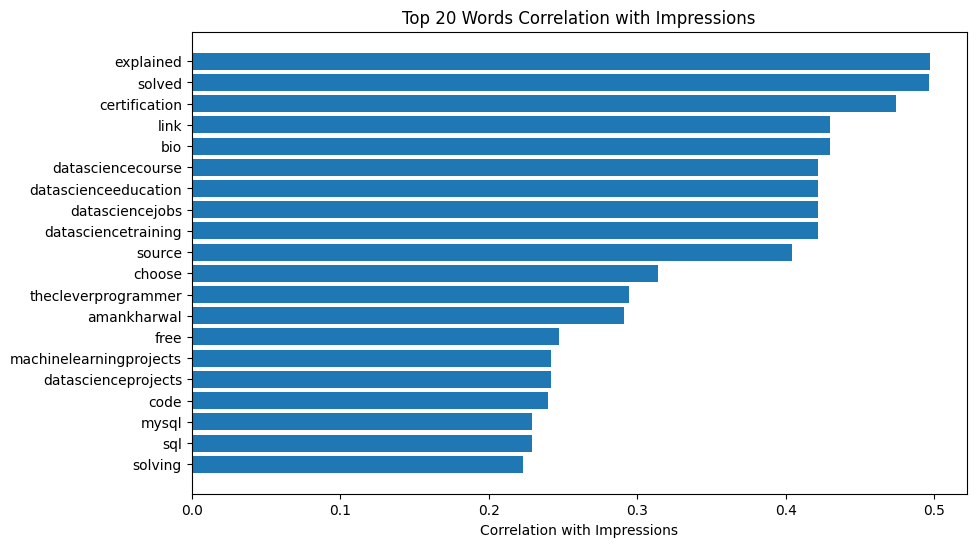

In [27]:
import matplotlib.pyplot as plt

# Set the number of top words to display
top_n = 20

# Get the top N words with the highest absolute correlation coefficients
top_words = word_correlation_df.iloc[:top_n, :]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_words['Word'], top_words['Correlation_with_Impressions'])
plt.xlabel('Correlation with Impressions')
plt.title('Top {} Words Correlation with Impressions'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to have the highest correlation at the top
plt.show()

In [28]:
# Compute correlation matrix between TF-IDF features and impressions
correlation_matrix = np.corrcoef(tfidf_df.values.T, captionDF['Likes'])

# Get correlation coefficients for each word
likes_correlation = correlation_matrix[:-1, -1]

# Create a DataFrame to display word correlations
likes_correlation_df = pd.DataFrame({
    'Word': tfidf_df.columns,
    'Correlation_with_Likes': likes_correlation
})

# Sort DataFrame by correlation coefficient in descending order
likes_correlation_df = likes_correlation_df.sort_values(by='Correlation_with_Likes', ascending=False)

print(likes_correlation_df)

                    Word  Correlation_with_Likes
68         certification                0.457774
8            amankharwal                0.432245
477  thecleverprogrammer                0.419642
164            explained                0.414456
433               solved                0.405698
..                   ...                     ...
16             analytics               -0.227649
129    datavisualization               -0.235501
82                coding               -0.238200
468                 tech               -0.264592
470           technology               -0.286779

[545 rows x 2 columns]


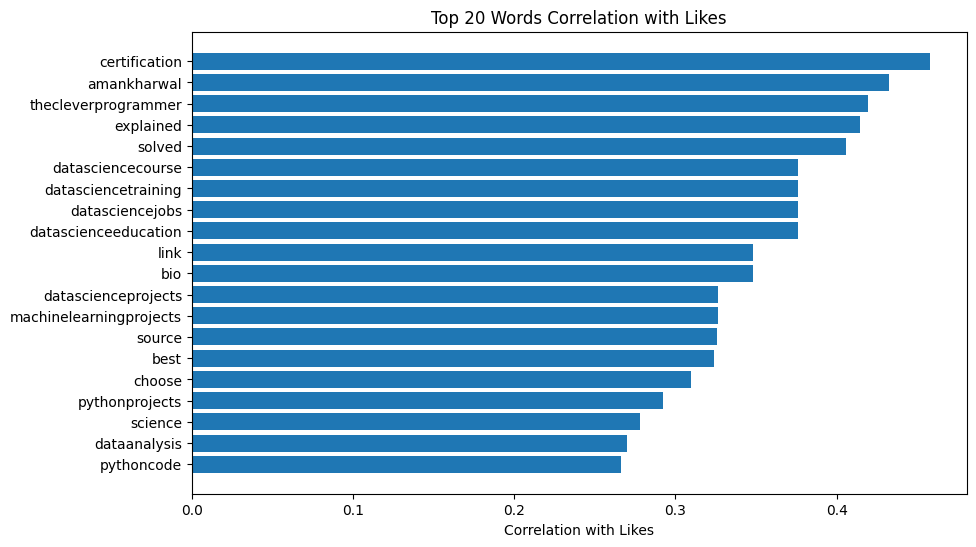

In [32]:
import matplotlib.pyplot as plt

# Set the number of top words to display
top_n = 20

# Get the top N words with the highest absolute correlation coefficients
top_words = likes_correlation_df.iloc[:top_n, :]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_words['Word'], top_words['Correlation_with_Likes'])
plt.xlabel('Correlation with Likes')
plt.title('Top {} Words Correlation with Likes'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to have the highest correlation at the top
plt.show()

In [6]:
# Extract list of columns
data_cols = list(data.columns)
print('Dataset columns: {}'.format(data_cols))

Dataset columns: ['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows', 'Caption', 'Hashtags']


In [7]:
data_columns = pd.DataFrame(data, columns = data_cols)

In [8]:
n_samples = 20

def bootstrap_data(df, n_samples):
    bootstrap_samples = []
    for i in range(n_samples):
        bootstrap_sample = pd.DataFrame()
        for column in df.columns:
            sample = df[column].sample(n=len(df), replace=True).reset_index(drop=True)
            bootstrap_sample[column] = sample
        bootstrap_samples.append(bootstrap_sample)
    return bootstrap_samples

bootstrap_samples = bootstrap_data(data_columns, n_samples)

for bootstrap_sample in bootstrap_samples:
    data_columns = pd.concat([data_columns, bootstrap_sample], ignore_index=True)

data_columns


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,5538,2108,476,433,37,144,8,4,107,20,2,Here are some of the best data science project...,#data #datascience #dataanalysis #dataanalytic...
2495,8001,3050,3450,157,172,421,7,1,115,23,2,Here are some of the most important Python lib...,#data #datascience #dataanalysis #dataanalytic...
2496,4150,1570,628,244,748,90,6,14,257,26,4,Heres how to visualize an interactive candles...,#career #job #jobs #jobsearch #education #busi...
2497,36919,2085,10008,521,292,28,7,0,95,8,6,Here are some of the best websites that you ca...,#python #pythonprogramming #pythonprojects #py...


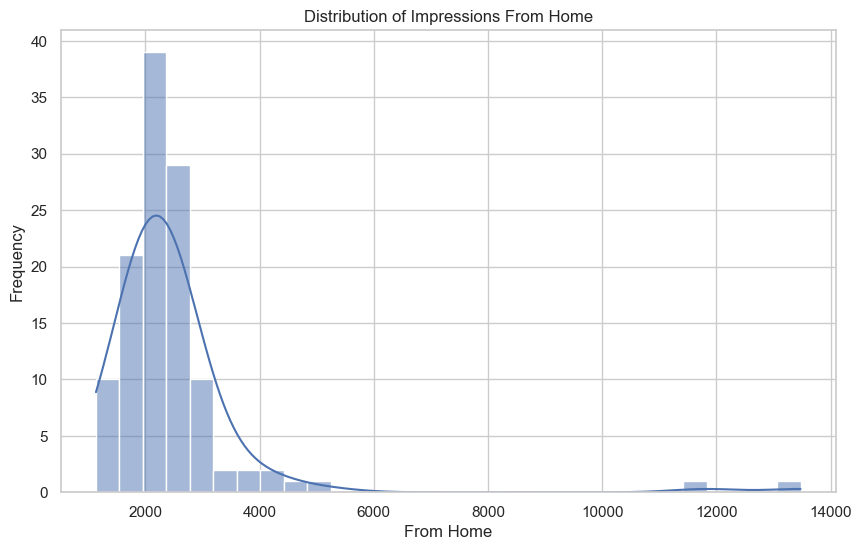

In [8]:
sb.set(style="whitegrid")

# Function to plot distribution for a given column
def plot_distribution(data, column_name, title):
    plt.figure(figsize=(10, 6))
    sb.histplot(data[column_name], kde=True, bins=30)
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Plotting distributions for each column
plot_distribution(data, 'From Home', 'Distribution of Impressions From Home')

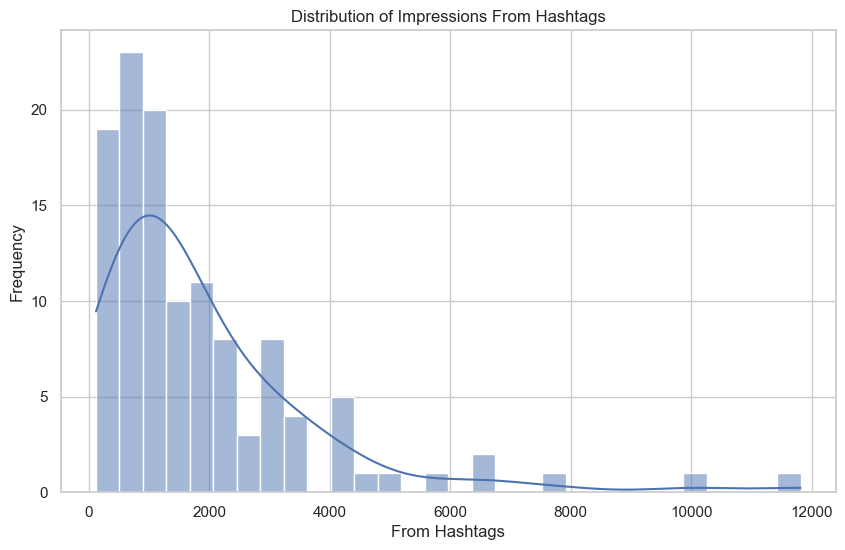

In [9]:
# Plotting distribution for "From Hashtags"
plot_distribution(data, 'From Hashtags', 'Distribution of Impressions From Hashtags')

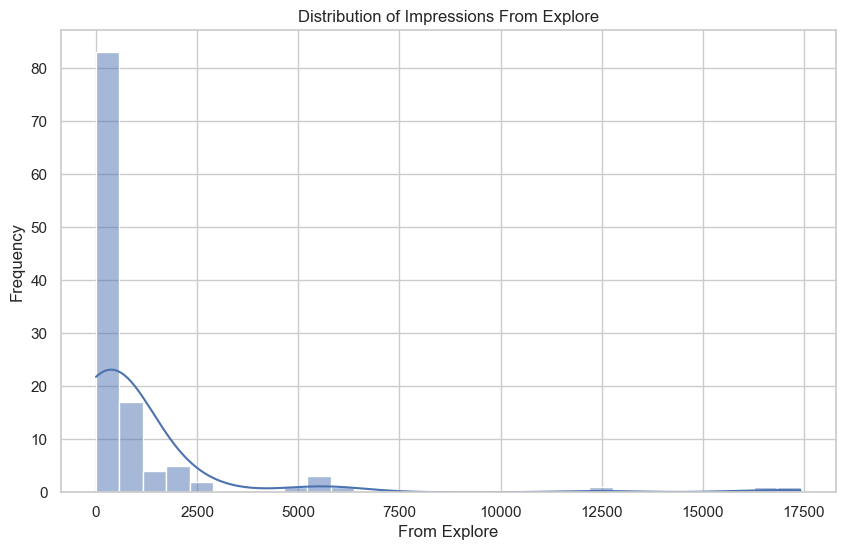

In [10]:
# Plotting distribution for "From Explore"
plot_distribution(data, 'From Explore', 'Distribution of Impressions From Explore')

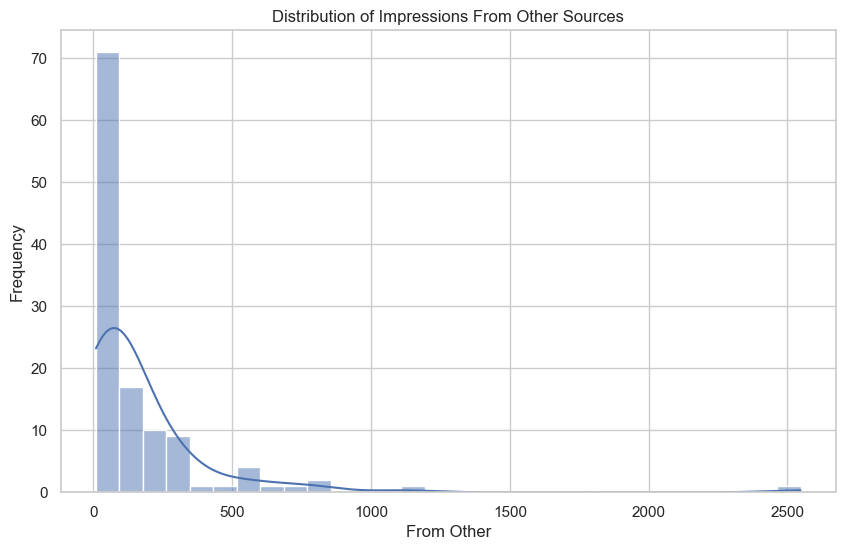

In [11]:
# Plotting distribution for "From Other"
plot_distribution(data, 'From Other', 'Distribution of Impressions From Other Sources')

In [12]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.4)
fig.show()